installing important dependencies

In [ ]:
!pip install diffusers transformers accelerate scipy safetensors -q

Loading Stabel Diffusion model from hugging face

In [ ]:
from diffusers import StableDiffusionPipeline
import torch

model_id = "stabilityai/stable-diffusion-2"

device = "cuda" if torch.cuda.is_available() else "cpu"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to(device)

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/537 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/345 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/824 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/633 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/909 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/611 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

Generating some random sample images

  0%|          | 0/50 [00:00<?, ?it/s]

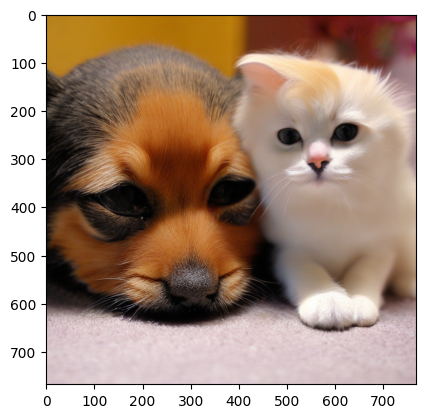

In [ ]:
import matplotlib.pyplot as plt

prompt = "cute cats and dogs"
image = pipe(prompt).images[0]
plt.axis('off')
plt.imshow(image)

  0%|          | 0/50 [00:00<?, ?it/s]

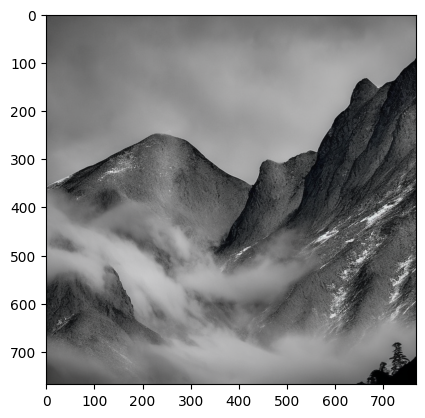

In [ ]:
prompt = "Mountains in thunder storm"
image = pipe(prompt).images[0]
plt.axis('off')
plt.imshow(image)

Saving model

In [ ]:
save_directory = "/content/model/stable_diffusion_local"
pipe.save_pretrained(save_directory)

Loading Saved model and making predictions

In [ ]:
save_directory = "/content/model/stable_diffusion_local"

device = "cuda" if torch.cuda.is_available() else "cpu"
pipeline = StableDiffusionPipeline.from_pretrained(
    save_directory,
    torch_dtype=torch.float16
).to(device)

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

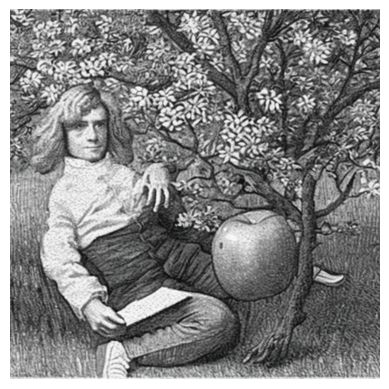

In [ ]:
prompt = "issac newton sitting under a apple tree"
image = pipe(prompt).images[0]
plt.axis('off')
plt.imshow(image)